In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

# MitoCarta parsing

In [2]:
MitoCarta3_file = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/MITOCARTA3.0/Mouse.MitoCarta3.0.xls'
MitoCarta = pd.read_excel(MitoCarta3_file, 'A Mouse MitoCarta3.0')
MitoPW    = pd.read_excel(MitoCarta3_file, 'C MitoPathways')

name2ID = MitoCarta[['Symbol','EnsemblGeneID']].set_index('Symbol')['EnsemblGeneID'].to_dict()

MitoPW['PW level'] = MitoPW['MitoPathway Hierarchy'].str.split('>').str.len()
MitoPW['gene_ids'] = ''
for i in range(len(MitoPW)):
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2ID[gene]) == float : continue
        MitoPW['gene_ids'][i] += name2ID[gene].replace('|',',') + ','
    MitoPW['gene_ids'][i] = MitoPW['gene_ids'][i][:-1]
MitoPW = MitoPW.set_index('MitoPathway',drop=True)

display(MitoPW[:5])

/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_55609/644145054.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MitoPW['gene_ids'][i] += name2ID[gene].replace('|',',') + ','
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_55609/644145054.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MitoPW['gene_ids'][i] = MitoPW['gene_ids'][i][:-1]


,MitoPathway Hierarchy,Genes,PW level,gene_ids
MitoPathway,,,,
Mitochondrial central dogma,Mitochondrial central dogma,"2810006K23Rik, Aars2, Alkbh1, Angel2, Apex1, A...",1,"ENSMUSG00000047635,ENSMUSG00000023938,ENSMUSG0..."
mtDNA maintenance,Mitochondrial central dogma > mtDNA maintenance,"Apex1, Atad3a, Dna2, Endog, Exog, Lig3, Mettl4...",2,"ENSMUSG00000035960,ENSMUSG00000029036,ENSMUSG0..."
mtDNA replication,Mitochondrial central dogma > mtDNA maintenanc...,"Dna2, Exog, Lig3, Mgme1, Polg, Polg2, Polrmt, ...",3,"ENSMUSG00000036875,ENSMUSG00000042787,ENSMUSG0..."
mtDNA nucleoid,Mitochondrial central dogma > mtDNA maintenanc...,"Atad3a, Mterf1a, Mterf1b, Mterf2, Poldip2, Pol...",3,"ENSMUSG00000029036,ENSMUSG00000040429,ENSMUSG0..."
mtDNA repair,Mitochondrial central dogma > mtDNA maintenanc...,"Apex1, Exog, Lig3, Ogg1, Polb, Polg, Primpol, ...",3,"ENSMUSG00000035960,ENSMUSG00000042787,ENSMUSG0..."


In [3]:
mtDNA = MitoCarta[['Symbol','EnsemblGeneID']]
mtDNA = mtDNA[mtDNA['Symbol'].str.startswith('mt-')].reset_index(drop=True)
mtDNA = mtDNA.rename(columns={'Symbol':'gene_name', 'EnsemblGeneID':'gene_id'})[['gene_id']]
mtDNA['mtDNA'] = 'mtDNA'
# display(mtDNA)

# Plotting

In [4]:
PT = pd.read_csv(f'{Project}/Results/Tables/Proteome/PT_Norm_FC_calculation/v20240403/adi_PT_log2FC.tsv', sep='\t')
PT_conv = pd.read_csv(f'{Project}/Results/Tables/Proteome/adi_proteome_logExp_geneid.tsv', sep='\t', usecols=('uniprot_id','gene_id')).drop_duplicates(subset='gene_id')
PT = pd.merge(PT_conv, PT, on='uniprot_id').drop(columns='uniprot_id')

display(PT)

,gene_id,PT4a,PT4b,PT4c,PT8a,PT8b,PT8c
0,ENSMUSG00000104713,-0.021814,0.138830,-0.229074,0.722843,0.979965,0.836588
1,ENSMUSG00000031095,0.406935,0.203092,0.308152,0.249694,0.306746,0.175435
2,ENSMUSG00000034931,0.543776,0.033552,0.577999,1.478565,1.378814,1.486522
3,ENSMUSG00000074582,0.292834,0.299124,0.259298,0.421034,0.519817,0.358284
4,ENSMUSG00000018363,0.004651,0.163586,-0.025625,-0.273726,-0.295009,-0.403657
...,...,...,...,...,...,...,...
4870,ENSMUSG00000031485,0.367993,0.316386,0.338422,0.631596,0.569770,0.541744
4871,ENSMUSG00000032602,2.200859,1.589731,2.168014,3.033208,3.632798,3.010671
4872,ENSMUSG00000020363,-0.780922,-0.363783,-0.753494,-0.457981,-0.771143,-0.599186
4873,ENSMUSG00000022779,0.049914,0.086033,0.061373,0.188328,0.351880,0.033206


In [5]:
# Plot data
MTPWs = ['CI subunits',
         'CII subunits',
         'CIII subunits',
         'CIV subunits',
         'CV subunits']

plot_data = pd.DataFrame(columns=['Value','Day','rep','gene_id','MitoPW'])
for MTPW in MTPWs:
    genes = pd.DataFrame({'gene_id' : MitoPW.loc[MTPW,'gene_ids'].split(',')})  
    genes_table = pd.merge(genes, PT[['gene_id']+[f'PT{day}{rep}' for day in ['4','8'] for rep in ['a','b','c']]], on='gene_id')
    genes_table = pd.melt(genes_table, id_vars=['gene_id'], value_vars=[f'PT{day}{rep}' for day in ['4','8'] for rep in ['a','b','c']])
    genes_table['Day'] = genes_table['variable'].str[2] 
    genes_table['rep'] = genes_table['variable'].str[3]
    genes_table['MitoPW'] = MTPW
    genes_table = genes_table.drop(columns='variable').rename(columns={'value':'Value'})
    plot_data = pd.concat([plot_data, genes_table])

plot_data = pd.merge(plot_data, mtDNA, on='gene_id', how='left').replace(np.nan, 'ncDNA')

display(plot_data)

,Value,Day,rep,gene_id,MitoPW,mtDNA
0,1.176699,4,a,ENSMUSG00000064363,CI subunits,mtDNA
1,0.956527,4,a,ENSMUSG00000064367,CI subunits,mtDNA
2,1.076391,4,a,ENSMUSG00000016427,CI subunits,ncDNA
3,1.022506,4,a,ENSMUSG00000026260,CI subunits,ncDNA
4,1.114157,4,a,ENSMUSG00000020022,CI subunits,ncDNA
...,...,...,...,...,...,...
457,1.688757,8,c,ENSMUSG00000022956,CV subunits,ncDNA
458,1.390372,8,c,ENSMUSG00000000563,CV subunits,ncDNA
459,-0.301239,8,c,ENSMUSG00000054428,CV subunits,ncDNA
460,1.045618,8,c,ENSMUSG00000054894,CV subunits,ncDNA


/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_55609/1431795161.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=using_data, x="Value", y="MitoPW",
/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_55609/1431795161.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(data=using_data, x="Value", y="MitoPW",


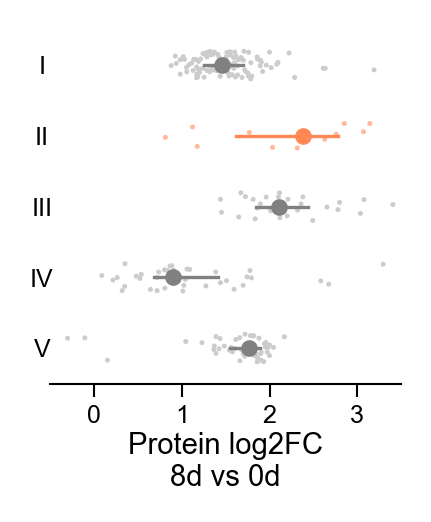

<Figure size 640x480 with 0 Axes>

In [6]:
day = '8'

sF = 1.15 # Size factor
wgap = 0.3
hgap = 0.1
nrow, ncol = 2, 2

height_ratios = [1, 0.3]
width_ratios = [0.1, 0.9]

fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF
fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios=height_ratios,
                    width_ratios=width_ratios,
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)


# Strip + point ----------------------------------------------------------------------------------------

ax = fig.add_subplot(grid[0,1])

using_data = plot_data[plot_data['Day']==day]
sns.stripplot(data=using_data, x="Value", y="MitoPW",
                # c='#CCCCCC',
                palette=['#CCCCCC','#FFBB99','#CCCCCC','#CCCCCC','#CCCCCC'],
                size = 1.2, 
                jitter= 0.2,
                ax=ax, linewidth = 0,
                legend=False)
sns.pointplot(data=using_data, x="Value", y="MitoPW", 
                estimator='median', marker=".", markersize=8, markeredgewidth=0, 
                # color='#808080',
                palette=['#808080','#FF8855','#808080','#808080','#808080'],
                errorbar=('pi',50), lw=0.8,
                # errorbar='ci', lw=0.8,
                linestyle="none", zorder=5)

ax.set_xlim(-0.5, 3.5)
# ax.set_xticks((-2,-1,0,1))
ax.set_yticks([*range(5)])
ax.set_yticklabels(['I','II','III','IV','V'], ha='center')
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='y', length=0, pad=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)    

ax.set_xlabel(f'Protein log2FC\n{day}d vs 0d', labelpad=1)
ax.set_ylabel('')


plt.savefig(f'OXPHOS_PTlogFC_strip-point_{day}d.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [7]:
from scipy.stats import mannwhitneyu

print(mannwhitneyu(using_data[using_data['MitoPW']=='CI subunits']['Value'], using_data[using_data['MitoPW']=='CII subunits']['Value']))
print(mannwhitneyu(using_data[using_data['MitoPW']=='CIII subunits']['Value'], using_data[using_data['MitoPW']=='CII subunits']['Value']))
print(mannwhitneyu(using_data[using_data['MitoPW']=='CIV subunits']['Value'], using_data[using_data['MitoPW']=='CII subunits']['Value']))
print(mannwhitneyu(using_data[using_data['MitoPW']=='CV subunits']['Value'], using_data[using_data['MitoPW']=='CII subunits']['Value']))

MannwhitneyuResult(statistic=316.0, pvalue=0.006364185190308544)
MannwhitneyuResult(statistic=153.0, pvalue=0.7959077987383173)
MannwhitneyuResult(statistic=68.0, pvalue=0.0002377967648164894)
MannwhitneyuResult(statistic=167.0, pvalue=0.01534067929794581)
